<h1>Exploring USA.gov Data from Bitly</h1>

<h3>Analyze data from Bitly about users who make shorter links ending with <code>.gov</code> or <code>.mil</code>. This notebook is based on <code>bitly_handler.py</code> script.</h3>

In [1]:
import json

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

Get data from file

In [2]:
path = '../datasets/bitly/example.txt'
records = [json.loads(line) for line in open(path)]

Get all timezones from data

In [3]:
time_zones = [rec['tz'] for rec in records if 'tz' in rec]

Count timezones in dataset

In [4]:
df = pd.DataFrame(records)
df

,a,c,nk,tz,gr,g,h,l,al,hh,r,u,t,hc,cy,ll,_heartbeat_,kw
0,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,US,1.0,America/New_York,MA,A6qOVH,wfLQtf,orofrog,"en-US,en;q=0.8",1.usa.gov,http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/...,http://www.ncbi.nlm.nih.gov/pubmed/22415991,1.331923e+09,1.331823e+09,Danvers,"[42.576698, -70.954903]",NaN,NaN
1,GoogleMaps/RochesterNY,US,0.0,America/Denver,UT,mwszkS,mwszkS,bitly,NaN,j.mp,http://www.AwareMap.com/,http://www.monroecounty.gov/etc/911/rss.php,1.331923e+09,1.308262e+09,Provo,"[40.218102, -111.613297]",NaN,NaN
2,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...,US,1.0,America/New_York,DC,xxr3Qb,xxr3Qb,bitly,en-US,1.usa.gov,http://t.co/03elZC4Q,http://boxer.senate.gov/en/press/releases/0316...,1.331923e+09,1.331920e+09,Washington,"[38.9007, -77.043098]",NaN,NaN
3,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...,BR,0.0,America/Sao_Paulo,27,zCaLwp,zUtuOu,alelex88,pt-br,1.usa.gov,direct,http://apod.nasa.gov/apod/ap120312.html,1.331923e+09,1.331923e+09,Braz,"[-23.549999, -46.616699]",NaN,NaN
4,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,US,0.0,America/New_York,MA,9b6kNl,9b6kNl,bitly,"en-US,en;q=0.8",bit.ly,http://www.shrewsbury-ma.gov/selco/,http://www.shrewsbury-ma.gov/egov/gallery/1341...,1.331923e+09,1.273672e+09,Shrewsbury,"[42.286499, -71.714699]",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3555,Mozilla/4.0 (compatible; MSIE 9.0; Windows NT ...,US,1.0,America/New_York,NJ,e5SvKE,fqPSr9,tweetdeckapi,en,1.usa.gov,direct,http://www.fda.gov/AdvisoryCommittees/Committe...,1.331927e+09,1.301298e+09,Paramus,"[40.9445, -74.07]",NaN,NaN
3556,Mozilla/5.0 (Windows NT 5.1) AppleWebKit/535.1...,US,0.0,America/Chicago,OK,jQLtP4,jQLtP4,bitly,"en-US,en;q=0.8",1.usa.gov,http://www.facebook.com/l.php?u=http%3A%2F%2F1...,http://www.okc.gov/PublicNotificationSystem/Fo...,1.331927e+09,1.307530e+09,Oklahoma City,"[35.4715, -97.518997]",NaN,NaN
3557,GoogleMaps/RochesterNY,US,0.0,America/Denver,UT,mwszkS,mwszkS,bitly,NaN,j.mp,http://www.AwareMap.com/,http://www.monroecounty.gov/etc/911/rss.php,1.331927e+09,1.308262e+09,Provo,"[40.218102, -111.613297]",NaN,NaN
3558,GoogleProducer,US,0.0,America/Los_Angeles,CA,zjtI4X,zjtI4X,bitly,NaN,1.usa.gov,direct,http://www.ahrq.gov/qual/qitoolkit/,1.331927e+09,1.327529e+09,Mountain View,"[37.419201, -122.057404]",NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3560 entries, 0 to 3559
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   a            3440 non-null   object 
 1   c            2919 non-null   object 
 2   nk           3440 non-null   float64
 3   tz           3440 non-null   object 
 4   gr           2919 non-null   object 
 5   g            3440 non-null   object 
 6   h            3440 non-null   object 
 7   l            3440 non-null   object 
 8   al           3094 non-null   object 
 9   hh           3440 non-null   object 
 10  r            3440 non-null   object 
 11  u            3440 non-null   object 
 12  t            3440 non-null   float64
 13  hc           3440 non-null   float64
 14  cy           2919 non-null   object 
 15  ll           2919 non-null   object 
 16  _heartbeat_  120 non-null    float64
 17  kw           93 non-null     object 
dtypes: float64(4), object(14)
memory usage: 500.8+ K

Clean data

In [6]:
clean_tz = df['tz'].dropna()
clean_tz = clean_tz[clean_tz != '']
tz_counts = clean_tz.value_counts()

Plotting first ten timezones

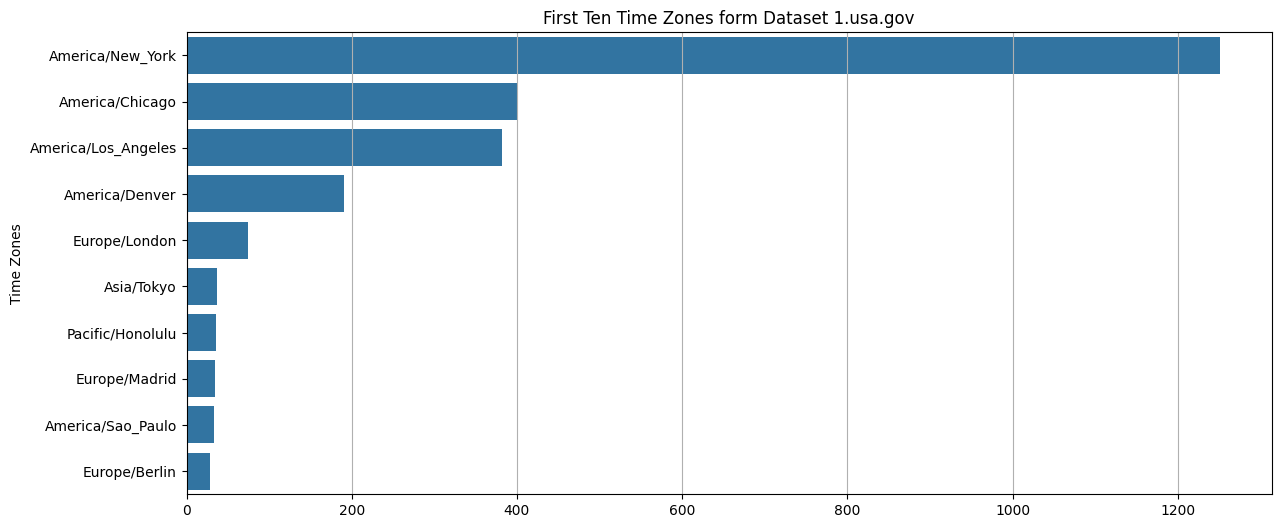

In [7]:
plt.figure(figsize=(14, 6))

t_z_c = tz_counts[:10]  # get first ten timezones

sns.barplot(
    y=t_z_c.index,
    x=t_z_c.values,
)

plt.ylabel("Time Zones")
plt.title("First Ten Time Zones form Dataset 1.usa.gov")

plt.grid(axis='x')
plt.show()

Get 'Windows' browser users

In [8]:
df = df[df['tz'] != '']  # remove empty rows
cframe = df[df.a.notnull()]
cframe = cframe.copy()
cframe['os'] = np.where(cframe['a'].str.contains('Windows'), 'Windows', 'Not Windows')

Group DataFrame by time zones

In [9]:
by_tz_os = cframe.groupby(['tz', 'os'])

Create table

In [10]:
agg_counts = by_tz_os.size().unstack().fillna(0)

Compute 'total' column

In [11]:
agg_counts['total'] = agg_counts.sum(axis=1)

Get 10 largest amount using `nlargset()` and keep as DataFrame

In [12]:
count_subset = agg_counts.nlargest(10, 'total')
count_subset

os,Not Windows,Windows,total
tz,,,
America/New_York,339.0,912.0,1251.0
America/Chicago,115.0,285.0,400.0
America/Los_Angeles,130.0,252.0,382.0
America/Denver,132.0,59.0,191.0
Europe/London,43.0,31.0,74.0
Asia/Tokyo,2.0,35.0,37.0
Pacific/Honolulu,0.0,36.0,36.0
Europe/Madrid,16.0,19.0,35.0
America/Sao_Paulo,13.0,20.0,33.0


Rearrange data for plotting

In [13]:
count_subset = count_subset.stack()
count_subset.name = 'total'
count_subset = count_subset.reset_index()

Remove from table 'total' rows

In [14]:
count_subset = count_subset[count_subset['os'] != 'total']

Calculate normalized total within each time zone

In [15]:
results = count_subset.groupby('tz').apply(
    lambda x: x.assign(normed_total=x.total / x.total.sum())
)

Plotting first ten time zones highlighting Windows

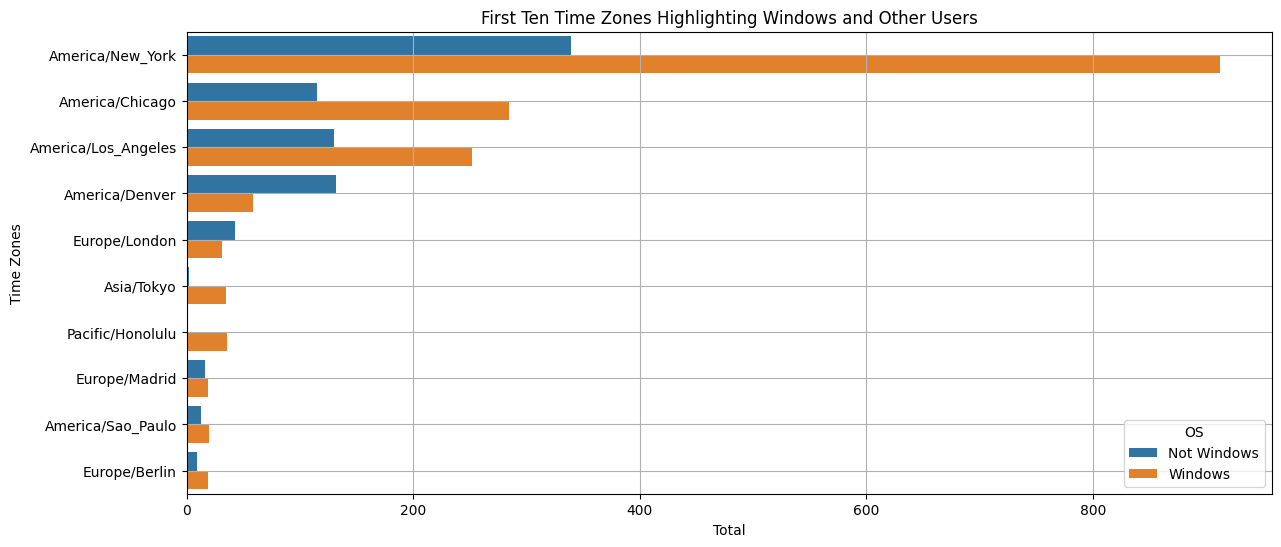

In [16]:
plt.figure(figsize=(14, 6))

sns.barplot(
    x='total',
    y='tz',
    hue='os',
    data=count_subset,
)

plt.ylabel("Time Zones")
plt.xlabel("Total")
plt.title("First Ten Time Zones Highlighting Windows and Other Users")

plt.legend(title="OS")
plt.grid(True)
plt.show()

Plotting percentage of Windows and other users

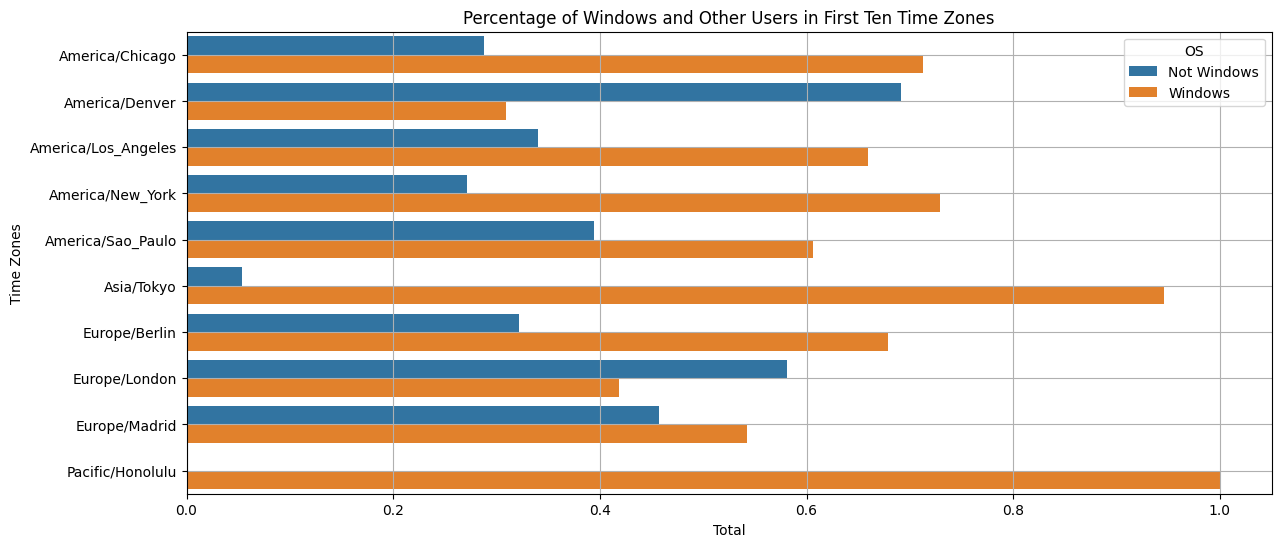

In [17]:
plt.figure(figsize=(14, 6))

sns.barplot(
    x='normed_total',
    y='tz',
    hue='os',
    data=results,
)

plt.ylabel("Time Zones")
plt.xlabel("Total")
plt.title("Percentage of Windows and Other Users in First Ten Time Zones")

plt.legend(title="OS")
plt.grid(True)
plt.show()